<a href="https://colab.research.google.com/github/KrisstinaVsh/ITMO-DigitalCulture/blob/master/Dataextraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Подгрузка библиотек:

In [196]:
import re
import pandas as pd
import matplotlib.pyplot as plt

Загрузка файла в Google Colab:

In [197]:
from google.colab import files
uploaded = files.upload()


Saving _H1.frf to _H1.frf


После загрузки файла вы можете считать его в DataFrame:

In [198]:
with open('_E1.frf', 'r') as file:
    data = file.read()



Паттерн для поиска данных между тегами:

In [199]:
pattern = re.compile(r'<Data>(.*?)</Data>', re.DOTALL)
matches = pattern.findall(data)


 Функция для извлечения значений из инт тегов

In [200]:
def extract_data_values(match):
    return [int(value) for value in re.findall(r'<int>(.*?)</int>', match, re.DOTALL)]

Создание таблицы

In [201]:
table = []
for index, match in enumerate(matches):
    time = index + 1
    data_values = extract_data_values(match)
    table.append({'time': time, 'clr1': data_values[0]})


Создание DataFrame с использованием pandas


In [202]:
df = pd.DataFrame(table)

In [203]:
# Теперь вы можете использовать методы pandas для дальнейшей обработки
time = df['time'].values
clr1_values = df['clr1'].values

Построение графиков

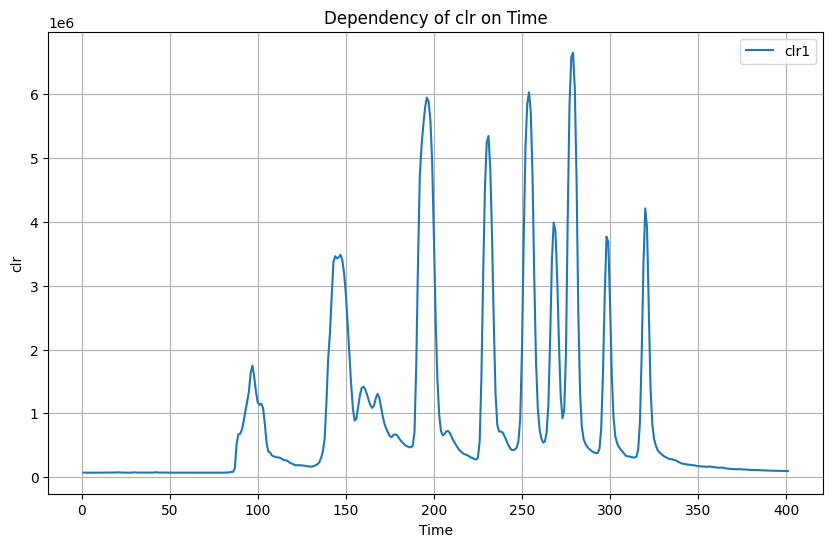

In [204]:
plt.figure(figsize=(10, 6))

for column in df.columns[1:]:
    plt.plot(df['time'], df[column], label=column)

plt.xlabel('Time')
plt.ylabel('clr')
plt.title('Dependency of clr on Time')
plt.legend()
plt.grid(True)
plt.show()


Сохранение DataFrame в txt файл

Индексы пиков: [96, 146, 159, 167, 195, 230, 253, 267, 278, 297, 319]
Значения пиков: [1747918 3483259 1418518 1304764 5947692 5347114 6031667 3989775 6652356
 3769374 4212128]


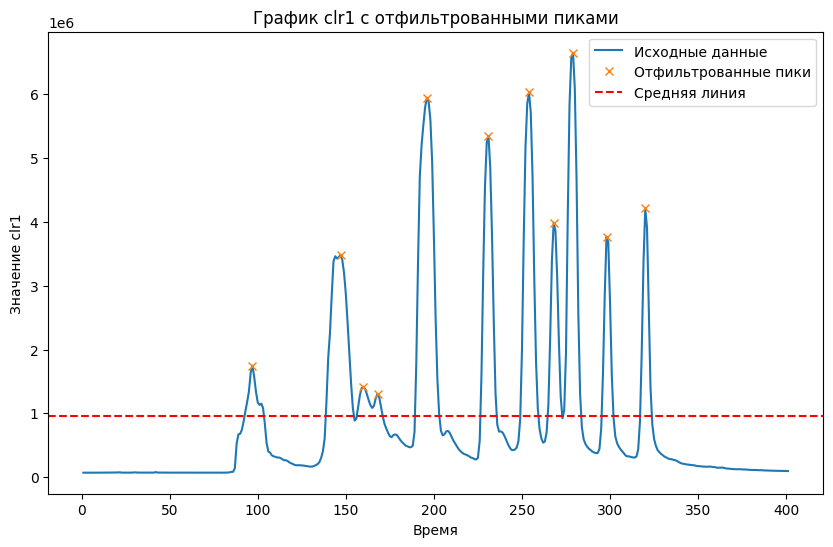

In [205]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

# Предполагаем, что df у вас уже заполнена данными и имеет колонки 'time' и 'clr1'
time = df['time'].values
clr1 = df['clr1'].values

# Вычисляем среднее значение clr1
mean_clr1 = np.mean(clr1)

# Определяем начальные параметры для поиска пиков
min_prominence = 0.1  # Минимальная "выраженность" пика
min_distance = 4      # Начальное минимальное расстояние между пиками
min_width = 2         # Минимальная ширина пика
min_height = mean_clr1  # Минимальная высота пика выше средней линии

# Список для хранения индексов найденных пиков
found_peaks = []

# Индекс, с которого начнется поиск следующего пика
start_index = 0

while start_index < len(clr1):
    # Ищем пики начиная с start_index
    peaks, _ = find_peaks(clr1[start_index:], prominence=min_prominence, distance=min_distance, width=min_width, height=min_height)

    # Если пики найдены, обрабатываем первый из них
    if peaks.size > 0:
        # Добавляем индекс первого найденного пика к общему списку пиков
        found_peak = start_index + peaks[0]
        found_peaks.append(found_peak)

        # Увеличиваем минимальное расстояние
        min_distance += 1

        # Обновляем start_index для поиска следующего пика
        start_index = found_peak + 1
    else:
        # Если пики не найдены, завершаем поиск
        break

# Выводим индексы найденных пиков
print("Индексы пиков:", found_peaks)

# Выводим значения пиков
peak_values = clr1[found_peaks]
print("Значения пиков:", peak_values)

# Строим график
plt.figure(figsize=(10, 6))
plt.plot(time, clr1, label='Исходные данные')
plt.plot(time[found_peaks], clr1[found_peaks], 'x', label='Отфильтрованные пики')
plt.axhline(y=mean_clr1, color='r', linestyle='--', label='Средняя линия')
plt.title('График clr1 с отфильтрованными пиками')
plt.xlabel('Время')
plt.ylabel('Значение clr1')
plt.legend()
plt.show()


   Индекс пика  Интенсивность  Длина фрагмента
0           96        1747918              100
1          146        3483259              200
2          297        3769374              300
3          267        3989775              400
4          319        4212128              500
5          230        5347114              600
6          195        5947692              700
7          253        6031667             1000
8          278        6652356             1500


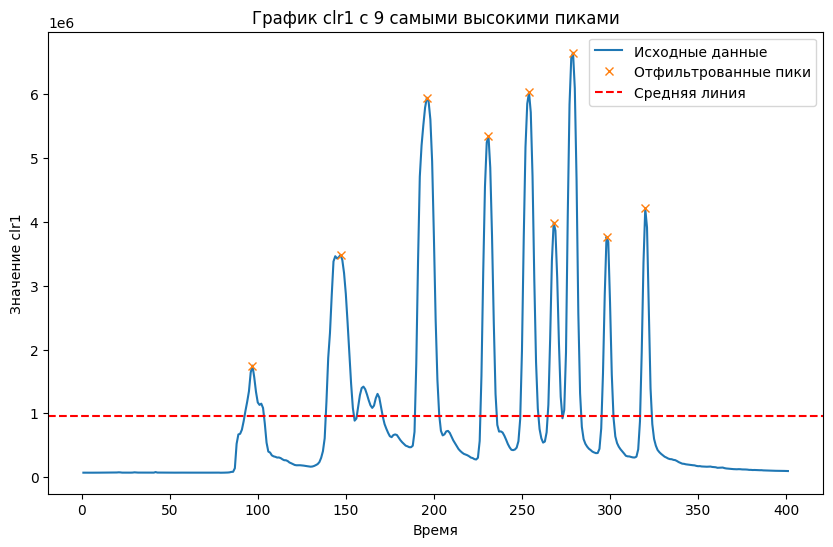

In [206]:
# Отсеиваем самые низкие пики, если их количество больше 9
if len(found_peaks) > 9:
    # Получаем значения пиков
    peak_values = clr1[found_peaks]
    # Сортируем пики по высоте и сохраняем индексы для 9 самых высоких
    found_peaks = np.array(found_peaks)[np.argsort(peak_values)[-9:]].tolist()

#Зададим длины
new_values = [100, 200, 300, 400, 500, 600, 700, 1000, 1500]

# Выводим значения отфильтрованных пиков
filtered_peak_values = clr1[found_peaks]


# Создаем DataFrame
df = pd.DataFrame({
    'Индекс пика': found_peaks,
    'Интенсивность': filtered_peak_values,
    'Длина фрагмента': new_values
})

# Выводим таблицу
print(df)


# Строим график с 9 самыми высокими пиками
plt.figure(figsize=(10, 6))
plt.plot(time, clr1, label='Исходные данные')
plt.plot(time[found_peaks], clr1[found_peaks], 'x', label='Отфильтрованные пики')
plt.axhline(y=mean_clr1, color='r', linestyle='--', label='Средняя линия')
plt.title('График clr1 с 9 самыми высокими пиками')
plt.xlabel('Время')
plt.ylabel('Значение clr1')
plt.legend()
plt.show()